# Pymaceuticals Inc.
---

### Analysis

The following code was used to analyze data reflecting tumor sizes for various mice at numerous timepoints and their relative treatements. 

-Within the study, there were 248 mice. 
-10 different drug treatments were tested
-the size(mm3) of the tumor was recoreded at various timepoints to evaluate the effectiveness of each treatment

### Observations/Inferences:
A summary statistics table was calculated for all treatments. The Standard Error of Mean(sem) was lowest for Capomulin, meaning it had the best sem score. This may be due to the amount of testing using this drug. As indicated by the bar graph, Capumolin had the most timepoints. 

A further study was conducted on Capomulin, Ramicane, Infubinol	and Ceftamin. At first, the tumor volume data was assessed using a box plot to determine if there were any outliers for each regimen. Infubinol was the only regimen with outliers in it's data.

A correlation coefficient and linear regression model was created for just the mice using Capomulin. This was done to see if there is a correlation between the weight of each mice and their tumor volume. The correlation coefficient calculated that the correlation between mouse weight and average tumor volume is 0.84. As complimented by the linear regression model, a fairly strong correlation exists. 




In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

study_data_merged = pd.merge(study_results, mouse_metadata, how="outer", on=["Mouse ID"])


# Display the data table for preview
study_data_merged

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [19]:
#Checking the number of mice
#Calculate the unique Mouse IDs
mouse_count = len(study_data_merged["Mouse ID"].unique())
mouse_count
print(f"There are {mouse_count} mice.")

There are 249 mice.


In [201]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
timepoint_duplicates = study_data_merged[study_data_merged.duplicated("Mouse ID")]
timepoint_duplicates2 = timepoint_duplicates[timepoint_duplicates.duplicated("Timepoint")]
timepoint_duplicates2.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
12,g107,5,48.791665,0,Ketapril,Female,2,29
13,g107,10,53.435987,0,Ketapril,Female,2,29
14,g107,15,58.135545,0,Ketapril,Female,2,29
15,g107,20,62.706031,0,Ketapril,Female,2,29
16,g107,25,64.663626,0,Ketapril,Female,2,29


In [200]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice = study_data_merged.loc[study_data_merged["Mouse ID"]!= "g989",:]
clean_mice.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [22]:
# Checking the number of mice in the clean DataFrame.
len(clean_mice["Mouse ID"].unique())

248

## Summary Statistics

In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.



tumor_mean = clean_mice.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
tumor_median = clean_mice.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
tumor_variance = clean_mice.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
tumor_std = clean_mice.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
tumor_sem = clean_mice.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

tumor_summary = pd.DataFrame ({"Mean Tumor Volume": tumor_mean,
                              "Meidan Tumor Volume": tumor_median,
                              "Tumor Volume Variance": tumor_variance,
                              "Tumor Volume Std. Dev.": tumor_std,
                              "Tumor Volume Std. Err.": tumor_sem})

tumor_summary

,Mean Tumor Volume,Meidan Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [24]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
clean_mice.groupby('Drug Regimen', as_index=True)["Tumor Volume (mm3)"].agg({"mean",
                                                                              "median", 
                                                                              "var",
                                                                              "std",
                                                                             "sem"
                                                                             })

,sem,std,mean,var,median
Drug Regimen,,,,,
Capomulin,0.329346,4.994774,40.675741,24.947764,41.557809
Ceftamin,0.469821,6.268188,52.591172,39.290177,51.776157
Infubinol,0.492236,6.567243,52.884795,43.128684,51.820584
Ketapril,0.603860,8.279709,55.235638,68.553577,53.698743
Naftisol,0.596466,8.134708,54.331565,66.173479,52.509285
Placebo,0.581331,7.821003,54.033581,61.168083,52.288934
Propriva,0.544332,6.622085,52.320930,43.852013,50.446266
Ramicane,0.320955,4.846308,40.216745,23.486704,40.673236
Stelasyn,0.573111,7.710419,54.233149,59.450562,52.431737


## Bar and Pie Charts

In [114]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

#generate new dataframe to plot the info
bar_mice = clean_mice.groupby(["Drug Regimen"]).count()
time_mice = bar_mice["Timepoint"]


In [115]:
time_mice.value_counts

<bound method IndexOpsMixin.value_counts of Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64>

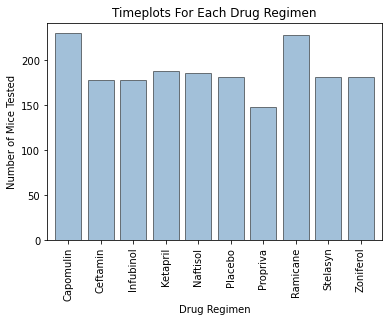

In [116]:
# Configure plot, figsize, title, and axis labels

time_mice.plot(kind="bar", color="steelblue", edgecolor='black', figsize=(6,4), align="center",alpha=0.5, width =0.8, 
                                   title="Timeplots For Each Drug Regimen",
                                   xlabel="Drug Regimen",
                                   ylabel="Number of Mice Tested")



# Show plot
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

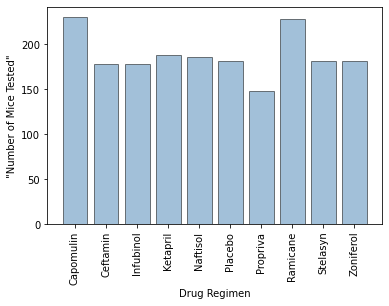

In [117]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = np.arange(len(time_mice))

x_axis = list(time_mice.keys()) 
plt.figure(figsize=(6,4))
plt.bar(x_axis,time_mice, color='steelblue', edgecolor='black', alpha=0.5, align="center")
plt.xlabel('Drug Regimen')
plt.ylabel('"Number of Mice Tested"')
plt.xticks(rotation=90)
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

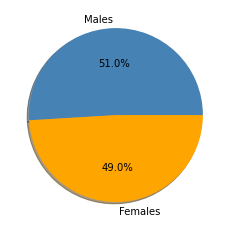

In [118]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas (DataFrame.plot())

# Labels for the sections of our pie chart
labels = ["Males", "Females"]

# The values of each section of the pie chart
sizes = [958, 922]

# The colors of each section of the pie chart
colors = ["steelblue", "orange"]

# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True)
plt.show

In [122]:
#Determine total mice, female mice
mice_plot = clean_mice.groupby(["Sex"]).count()
mice_count = mice_plot["Mouse ID"].reset_index()
print(mice_count)
mice_total = mice_count.sum()["Mouse ID"]

female_mice = 922/mice_total

      Sex  Mouse ID
0  Female       922
1    Male       958


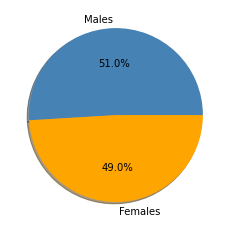

In [123]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
y = np.array([958, 922])
mylabels = ["Males", "Females"]

plt.pie(y, labels = mylabels, shadow=True, colors=["steelblue", "orange"], autopct='%1.1f%%')
plt.show()

## Quartiles, Outliers and Boxplots

In [33]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

In [126]:
#Group the original df by Mouse in order to retrieve timepoint
mouseid = clean_mice.groupby(["Mouse ID"])
mouseid.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1883,m601,0,45.000000,0,Capomulin,Male,22,17
1884,m601,5,41.408591,1,Capomulin,Male,22,17
1885,m601,10,36.825367,1,Capomulin,Male,22,17
1886,m601,15,35.464612,1,Capomulin,Male,22,17


In [127]:
#Create grouped dataframe to hold greatest/last timepoint of each mouse
mouseid = clean_mice.groupby(["Mouse ID"])
greatest_tp = mouseid["Timepoint"].max()
greatest_tp

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64

In [131]:
#put it into a dataframe for merging
greatest_tp_df = pd.DataFrame({"Timepoint": greatest_tp })


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tv_data_df = pd.merge(study_data_merged, greatest_tp_df, how="inner", on=["Timepoint", "Mouse ID"])

#Dropping some extra columns to help focus on important areas
clean_tv_data_df = tv_data_df.drop(columns=["Metastatic Sites", "Age_months","Sex" ])
clean_tv_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Drug Regimen,Weight (g)
0,b128,45,38.982878,Capomulin,22
1,f932,0,45.000000,Ketapril,29
2,g107,35,71.905117,Ketapril,29
3,a457,10,49.783419,Ketapril,30
4,c819,40,62.175705,Ketapril,25


In [132]:
# Put treatments into a list for loop (and later for plot labels)
treatments = ["Capomulin","Ramicane","Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
#self note: is this right, should it just be one list? 

Capomulin_tumor_list = []
Ramicane_tumor_list = []
Infubinol_tumor_list = []
Ceftamin_tumor_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
#self note: Quantitatively = 1.5 x IQR Rule

    # Locate the rows which contain mice on each drug and get the tumor volumes
capomulin_df = clean_tv_data_df[(clean_tv_data_df["Drug Regimen"] == "Capomulin")]
Ramicane_tumor_vol = clean_tv_data_df[(clean_tv_data_df["Drug Regimen"] == "Ramicane")]
Infubinol_tumor_vol = clean_tv_data_df[(clean_tv_data_df["Drug Regimen"] == "Infubinol")]
Ceftamin_tumor_vol = clean_tv_data_df[(clean_tv_data_df["Drug Regimen"] == "Ceftamin")]

 
    # add subset 
Capomulin_quartiles = capomulin_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
Ramicane_quartiles = Ramicane_tumor_vol["Tumor Volume (mm3)"].quantile([.25,.5,.75])
Infubinol_quartiles = Infubinol_tumor_vol["Tumor Volume (mm3)"].quantile([.25,.5,.75])
Ceftamin_quartiles = Ceftamin_tumor_vol["Tumor Volume (mm3)"].quantile([.25,.5,.75])

    # Determine outliers using upper and lower bounds
    #In the future I could do this in less steps

Capomulin_quartiles = capomulin_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
Ramicane_quartiles = Ramicane_tumor_vol["Tumor Volume (mm3)"].quantile([.25,.5,.75])
Infubinol_quartiles = Infubinol_tumor_vol["Tumor Volume (mm3)"].quantile([.25,.5,.75])
Ceftamin_quartiles = Ceftamin_tumor_vol["Tumor Volume (mm3)"].quantile([.25,.5,.75])

lowerq_cap = Capomulin_quartiles[0.25]
lowerq_ram = Ramicane_quartiles[0.25]
lowerq_inf = Infubinol_quartiles[0.25]
lowerq_cef = Ceftamin_quartiles[0.25]

upperq_cap = Capomulin_quartiles[0.75]
upperq_ram = Ramicane_quartiles[0.75]
upperq_inf = Infubinol_quartiles[0.75]
upperq_cef = Ceftamin_quartiles[0.75]

iqr1 = upperq_cap-lowerq_cap
iqr2 = upperq_ram-lowerq_ram
iqr3 = upperq_inf-lowerq_inf
iqr4 = upperq_cef-lowerq_cef

lower_bound_cap = lowerq_cap - (1.5*iqr1)
lower_bound_ram = lowerq_ram - (1.5*iqr2)
lower_bound_inf = lowerq_inf - (1.5*iqr3)
lower_bound_cef = lowerq_cef - (1.5*iqr4)

upper_bound_cap = upperq_cap + (1.5*iqr1)
upper_bound_ram = upperq_ram + (1.5*iqr2)
upper_bound_inf = upperq_inf + (1.5*iqr3)
upper_bound_cef = upperq_cef + (1.5*iqr4)

Capomulin_outliers = capomulin_df.loc[(capomulin_df["Tumor Volume (mm3)"] < lower_bound_cap) | 
                                              (capomulin_df["Tumor Volume (mm3)"] > upper_bound_cap)]
Ramicane_outliers = Ramicane_tumor_vol.loc[(Ramicane_tumor_vol["Tumor Volume (mm3)"] < lower_bound_ram) | 
                                              (Ramicane_tumor_vol["Tumor Volume (mm3)"] > upper_bound_ram)]
Infubinol_outliers = Infubinol_tumor_vol.loc[(Infubinol_tumor_vol["Tumor Volume (mm3)"] < lower_bound_inf) | 
                                              (Infubinol_tumor_vol["Tumor Volume (mm3)"] > upper_bound_inf)]
Ceftamin_outliers = Ceftamin_tumor_vol.loc[(Ceftamin_tumor_vol["Tumor Volume (mm3)"] < lower_bound_cef) | 
                                              (Ceftamin_tumor_vol["Tumor Volume (mm3)"] > upper_bound_cef)]

print(f"Capomulin's potential outliers: {Capomulin_outliers}")
print(f"Ramicane's potential outliers: {Ramicane_outliers}")
print(f"Infubinol's potential outliers: {Infubinol_outliers}")
print(f"Ceftamin's potential outliers: {Ceftamin_outliers}")

Capomulin's potential outliers: Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Drug Regimen, Weight (g)]
Index: []
Ramicane's potential outliers: Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Drug Regimen, Weight (g)]
Index: []
Infubinol's potential outliers:    Mouse ID  Timepoint  Tumor Volume (mm3) Drug Regimen  Weight (g)
29     c326          5           36.321346    Infubinol          25
Ceftamin's potential outliers: Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Drug Regimen, Weight (g)]
Index: []


In [133]:
#Just checking to see if formula worked, to understand why no outliers for most
Capomulin_quartiles = capomulin_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
Capomulin_quartiles

0.25    32.377357
0.50    38.125164
0.75    40.159220
Name: Tumor Volume (mm3), dtype: float64

In [134]:
#Creating Data Frame of findings, dropping index to accomodate in one dataframe so that box plots could be together.


cap_tv = capomulin_df["Tumor Volume (mm3)"]
cap_tv = cap_tv.reset_index(drop=True)
ram_tv = Ramicane_tumor_vol["Tumor Volume (mm3)"]
ram_tv = ram_tv.reset_index(drop=True)
inf_tv = Infubinol_tumor_vol["Tumor Volume (mm3)"]
inf_tv = inf_tv.reset_index(drop=True)
cef_tv = Ceftamin_tumor_vol["Tumor Volume (mm3)"]
cef_tv = cef_tv.reset_index(drop=True)


tumor_vol_df = pd.DataFrame ({"Capomulin": cap_tv, 
                              "Ramicane": ram_tv, 
                              "Infubinol": inf_tv, 
                              "Ceftamin": cef_tv
                             })
tumor_vol_df.reset_index
tumor_vol_df.head()

,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,38.342008,36.321346,61.386660
1,38.753265,36.561652,72.226731,46.784535
2,32.377357,31.560470,46.250112,64.299830
3,23.343598,38.407618,57.031862,48.722078
4,38.939633,43.047543,67.685569,57.918381


Text(0, 0.5, 'Final Tumor Volume (mm3)')

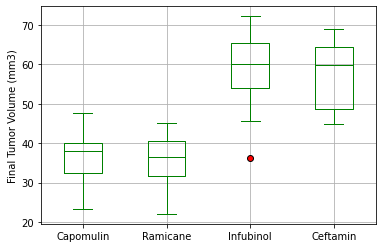

In [181]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

    #store the distribution of tumor volume data in a new dataframe
cap_tv = capomulin_df["Tumor Volume (mm3)"]
cap_tv = cap_tv.reset_index(drop=True)
ram_tv = Ramicane_tumor_vol["Tumor Volume (mm3)"]
ram_tv = ram_tv.reset_index(drop=True)
inf_tv = Infubinol_tumor_vol["Tumor Volume (mm3)"]
inf_tv = inf_tv.reset_index(drop=True)
cef_tv = Ceftamin_tumor_vol["Tumor Volume (mm3)"]
cef_tv = cef_tv.reset_index(drop=True)


tumor_vol_df = pd.DataFrame ({"Capomulin": cap_tv, 
                              "Ramicane": ram_tv, 
                              "Infubinol": inf_tv, 
                              "Ceftamin": cef_tv
                             })
tumor_vol_df.reset_index

red_circle = dict(markerfacecolor='r', marker='o')

tumor_boxplot = tumor_vol_df.boxplot( column=["Capomulin","Ramicane","Infubinol","Ceftamin"], by=None, ax=None, fontsize=10,  rot=0
                                     , grid=True, figsize=None, layout=None, return_type=None, backend=None, color='green', flierprops=red_circle,)

tumor_boxplot.set_ylabel("Final Tumor Volume (mm3)", fontsize=10)



## Line and Scatter Plots

In [182]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

    #Identify mice who were part of Capomulin research
capomulin_df = clean_mice[(clean_mice["Drug Regimen"] == "Capomulin")]
capomulin_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


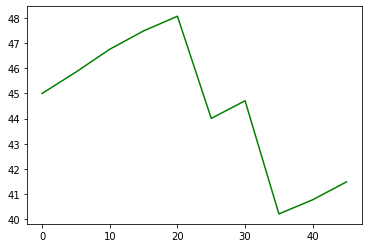

In [183]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#Mouse l509

Capomulin_time = clean_mice[(clean_mice["Mouse ID"] == "l509")]["Timepoint"]
Capomulin_tv = clean_mice[(clean_mice["Mouse ID"] == "l509")]["Tumor Volume (mm3)"]


#Generate line
l509_line = plt.plot(Capomulin_time, Capomulin_tv, color="green", label="Mouse l509 AKA Jimbo" )

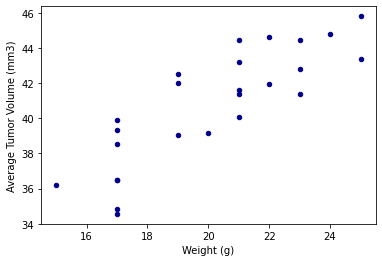

In [195]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

cappy_weight = clean_mice[(clean_mice["Drug Regimen"] == "Capomulin")].groupby(["Mouse ID"]).mean()["Weight (g)"]
avg_tv_scatters = clean_mice[(clean_mice["Drug Regimen"] == "Capomulin")].groupby(["Mouse ID"]).mean()["Tumor Volume (mm3)"]


#Dataframe
scatter_df = pd.DataFrame ({"Average Tumor Volume (mm3)": avg_tv_scatters,
                        "Weight (g)": cappy_weight})


scatterplotbest = scatter_df.plot.scatter(x='Weight (g)',
                                       y='Average Tumor Volume (mm3)', 
                                       c='DarkBlue')

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


The correlation between mouse weight and average tumor volume is 0.84


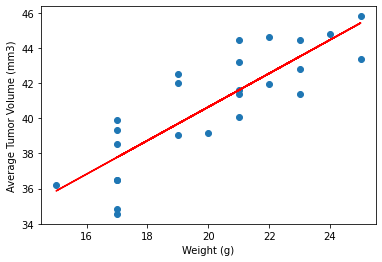

In [199]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen



correlation = st.pearsonr(cappy_weight, avg_tv_scatters)

print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")
 
    
    #use line equation

x_values = cappy_weight
y_values = avg_tv_scatters
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()